<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/filtro1erorden.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Explicación del filtro IIR en tu código
Este filtro procesa una señal con ruido y suaviza sus fluctuaciones mediante una ecuación de diferencias. Se basa en la siguiente ecuación de filtro recursivo:

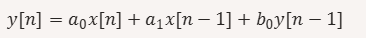

Donde:
* 𝑥[𝑛] → Entrada actual de la señal ruidosa.
* 𝑥[𝑛−1] → Entrada anterior de la señal.
* 𝑦[𝑛−1] → Salida anterior del filtro (memoria del sistema).
* 𝑦[𝑛] → Salida actual del filtro (resultado filtrado).
* 𝑎0, 𝑎1 → Coeficientes que determinan la influencia de las muestras actuales y anteriores en la salida.
* 𝑏 → Coeficiente de retroalimentación, que controla cómo la salida pasada influye en la salida actual.

📌 Interpretación de los coeficientes

✅ 𝑎0 = 0.05912, 𝑎1 = 0.05912 Estos coeficientes determinan el peso que tienen las muestras actuales y anteriores de la señal de entrada en la salida filtrada. Como son iguales, se está aplicando un filtro de suavizado simétrico.

✅ 𝑏0 = 0.8818 Este coeficiente define la retroalimentación del filtro, es decir, cuánto de la salida anterior afecta a la salida actual. Un valor cercano a 1 hace que el filtro tenga una mayor memoria y suavice más la señal.

📌 En resumen, este filtro reduce el ruido manteniendo una referencia de las entradas anteriores y aplicando un peso alto a la salida pasada.

📌 Mejoras y ajustes
Si deseas que el filtro tenga una respuesta más agresiva en la eliminación de ruido, puedes:

* Reducir b0 para disminuir la influencia de la salida anterior.
* Ajustar a0 y a1 para darle más peso a las muestras recientes.

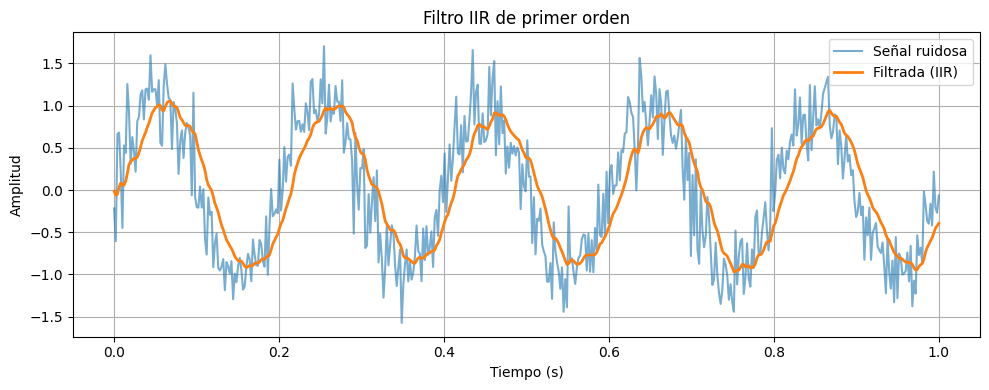

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Genera 500 valores igualmente espaciados entre 0 y 1.
t = np.linspace(0, 1, 500)
frecuencia = 5
# np.random.randn(len(t)) genera un arreglo de números aleatorios con distribución normal estándar (media 0, desviación estándar 1).
# La cantidad de números generados es igual a len(t), es decir, 500 valores aleatorios.
ruido = 0.3 * np.random.randn(len(t))
x = np.sin(2 * np.pi * frecuencia * t) + ruido

a0 = 0.05912
a1 = 0.05912
b0 = 0.8818

x_hist = [0, 0]
y_hist = [0, 0]
y = []

for n in range(len(x)):
    x_hist[1] = x_hist[0]
    x_hist[0] = x[n]

    y_hist[1] = y_hist[0]
    y_hist[0] = a0 * x_hist[0] + a1 * x_hist[1] + b0 * y_hist[1]

    y.append(y_hist[0])

plt.figure(figsize=(10, 4))
plt.plot(t, x, label="Señal ruidosa", alpha=0.6)
plt.plot(t, y, label="Filtrada (IIR)", linewidth=2)
plt.title("Filtro IIR de primer orden")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

